# Image Classification

## 데이터 준비

### 이미지 파일 지원, os 라이브러리 설치¶
Python Imaging Library(PIL)은 파이썬 인터프리터에 다양한 이미지 파일 형식을 지원하고  
강력한 이미지 처리와 그래픽 기능을 제공하는 자유-오픈 소스 소프트웨어 라이브러리

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
#!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
# 홈 디렉토리 확인
os.getenv("HOME")

'/home/ssac6'

### 가위 바위 보 이미지를 28x28로 사이즈 조정
 가위 (scissor), 바위 (rock), 보 (paper) 이미지가 들어 있는  각 디렉토리명을 feature 변수에 담아 반복문에서 처리

In [2]:
import os

feature = ['scissor','rock','paper']
for a in feature:
     # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/" + a
    print("이미지 디렉토리 경로: ", image_dir_path)

    images=glob.glob(image_dir_path + "/*.jpg")  

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

    print(f"{a} 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac6/aiffel/rock_scissor_paper/scissor
scissor 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac6/aiffel/rock_scissor_paper/rock
rock 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac6/aiffel/rock_scissor_paper/paper
paper 이미지 resize 완료!


### 가위 바위 보 이미지 데이터를 행렬로 저장, 라벨 생성 함수

In [2]:
import numpy as np
def load_data(img_path, n):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=n   # n : 가위바위보 이미지 개수 총합
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    
    
    print("데이터의 이미지 개수는",idx,"입니다.")
    return imgs, labels

### 훈련 데이터 셋과 테스트 데이터 셋 준비

훈련 데이터 셋과 테스트 데이터 셋을 데이터의 최대값 255로 나누어 정규화시켜 준비한다. 

In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

image_dir_path = os.getenv("HOME") + "/aiffel/test_rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)
데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [4]:
import numpy as np
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


## 모델 생성

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
#Conv2D()의 8, 16은 얼마나 다양한 이미지의 특징을 살펴볼 것인가? ( 입력 이미지가 다양할수록 더 많은 특징을 고려해보자. )
#input_shape=(28,28,3) 채널 수 흑백은 1, 칼라라면 3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#Dense()의 8은 분류기 알고리즘을 얼마나 복잡하게 할 것인가?( 복잡한 문제일수록 이 수를 늘려보자. )
#Dense()의 3은 최종분류기의 class 수, 여기서는 가위,바위,보까지 총 3개의 class를 구분하므로 3.
print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


## 모델 훈련 

optimizer : adm   
loss :sparse_categorical_crossentropy  다중분류손실함수 입력값을 정수값 그대로 사용할 때 사용   
metrics : accuracy 정확도로 평가   

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=50) #50회 반복 

Epoch 1/50
94/94 [==============================] - 5s 52ms/step - loss: 1.0860 - accuracy: 0.3900
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0011 - accuracy: 0.5077
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.8730 - accuracy: 0.6033
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.6643
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.6913
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7383
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7797
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.8100
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8307
Epoch 10/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8347
Epoch 11/50
94/94 

## 생성된 모델에 대한 확인

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 3208      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

## 모델 평가
### 손실은 1.59, 정확도가 65% 

In [8]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 1.5979 - accuracy: 0.6567
test_loss: 1.5979132652282715 
test_accuracy: 0.6566666960716248


### 모델이 잘못 예측한 결과를 라벨과 비교해서 확인

예측확률분포: [0.11540762 0.8135106  0.07108176]
라벨: 2, 예측결과: 1


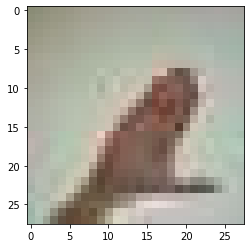

예측확률분포: [5.0030998e-04 9.9919254e-01 3.0716654e-04]
라벨: 0, 예측결과: 1


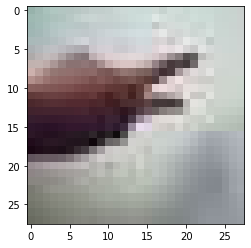

예측확률분포: [8.89573395e-01 4.78670467e-04 1.09947875e-01]
라벨: 2, 예측결과: 0


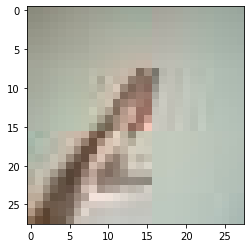

예측확률분포: [0.6158051  0.26941362 0.1147813 ]
라벨: 1, 예측결과: 0


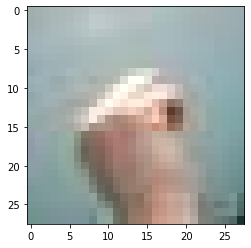

예측확률분포: [9.4594399e-04 6.5882755e-06 9.9904746e-01]
라벨: 1, 예측결과: 2


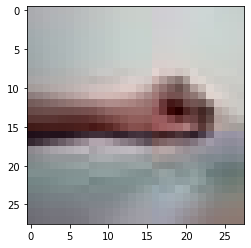

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)


wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 느낀점


#### 좋은 훈련 데이터를 많이 확보하는 것이 단연 모델의 정확도를 높이는 방법인것 같다.  

#### 하지만 데이터 양이 적을 때 최적의 하이퍼파라미터를 찾는데 도움이 될 수있는 교차검증(Cross Validation)을 배웠었다.

#### 이번 과제에서도 교차검증을 적용해 하이퍼파라미터를 찾을 수 있지 않을까 생각했었다. 하지만 하지 못했다. 

#### 사이킷런에서는 그리드서치나 랜덤서치를 이용해 하이퍼파라미터를 찾는데, 케라스로 만들어진 모델과 연결하는 방법도 있는거 같다. 

#### 아직 딥러닝에 공부가 부족해 무엇을 어떻게 해야 좋을지 모른체 프로젝트를 마무리한거 같아 아쉽다. 



